In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

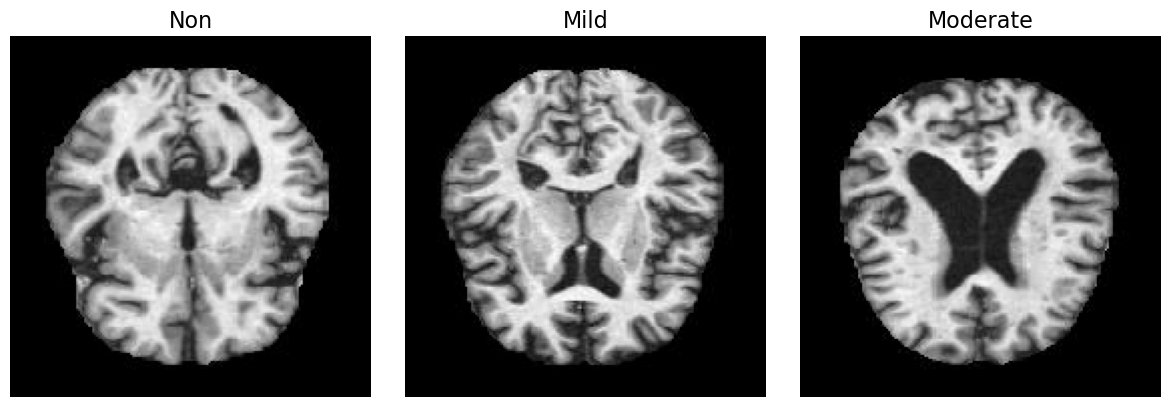

In [2]:
# Image titles
image_titles = ['Non', 'Mild', 'Moderate']

# Load images and Convert them to a Numpy array
img1 = load_img("/Users/zhiyumo/Downloads/Alzheimer's MRI/Test/Non/nonDem6.jpg", target_size=(180, 180))
img2 = load_img("/Users/zhiyumo/Downloads/Alzheimer's MRI/Test/Mild/verymildDem827.jpg", target_size=(180, 180))
img3 = load_img("/Users/zhiyumo/Downloads/Alzheimer's MRI/Test/Moderate/mildDem661.jpg", target_size=(180, 180))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
X.shape

(3, 180, 180, 3)

In [5]:
from keras.models import load_model
model = load_model("/Users/zhiyumo/Documents/AD_webapp/model/vgg16(8.18)weight.h5")

2023-08-22 01:13:24.576785: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-22 01:13:24.576937: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-22 01:13:24.576946: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-22 01:13:24.577767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-22 01:13:24.578604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


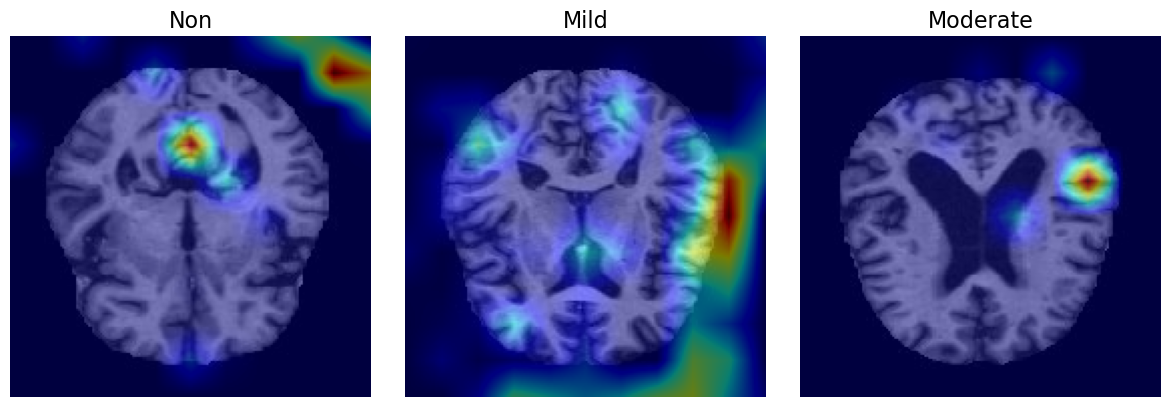

In [9]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()
from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([2, 0, 1])

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              X,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()